# <center>325(48) Bird Species - Classification</center>
Kaggle Computer Vision Dataset<br>
CP494 Directed Research Project<br>
Auther: Jingxuan Liu<br>ID: 173098550<br>

#### In this research peoject, I will classify the 48 species of birds (I only used 48 instead 325, because macbook can't handle such huge amounts of data, it took 3h for each epochs and will breakdown my mac)<br>I will comapare the model from scratch and the pre_trained model to see the performance differecne of them, and trying to figure out how transfer learning can improve efficiency in computer vision area<br>Finally we will using our model to test some sample

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
pd.options.mode.chained_assignment = None

# Prepare Data for Training<br>Analysis Data and Generating Data

Picture shape is:  (224, 224, 3)


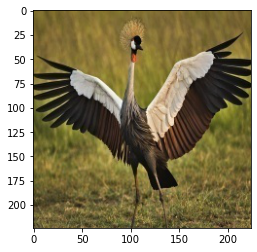

In [3]:
#We set datasets directory first
train_dir = './train' #training dataset
valid_dir = './valid' #validation dataset
test_dir = './test'   #testing dataset

#We checking the image shape to help us define the target size for generating
Bird = load_img("./train/AFRICAN CROWNED CRANE/002.jpg")
plt.imshow(Bird)
plt.show
shape = img_to_array(Bird).shape
print('Picture shape is: ', shape)

In [4]:
#Create image generator for train, validation and test data
Generator = ImageDataGenerator(rescale = 1./255)

#using build-in fuciton flow_from_directory to read the image
train = Generator.flow_from_directory(
    './train', 
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical')

valid = Generator.flow_from_directory(
    './valid', 
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical')

test = Generator.flow_from_directory(
    './test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical')
print("The length of train: {}\nvalid: {}\ntest: {}".format(len(train),len(valid),len(test)))

Found 6924 images belonging to 48 classes.
Found 240 images belonging to 48 classes.
Found 240 images belonging to 48 classes.
The length of train: 217
valid: 8
test: 8


We can see there is huge amounts of data,<br>we may need to control the training steps for each opochs to reduce training time

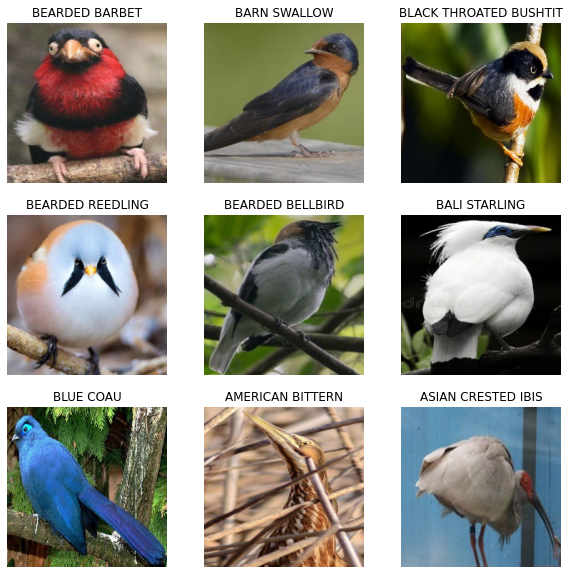

In [42]:
#Lets show some example of data
import random
images = []
labels = []
for i in range(0,9):
    n = random.randint(0, len(train.filenames))
    images.append(train_dir+'/'+train.filenames[n])
    labels.append(train.filenames[n].split('/')[0])

plt.figure(figsize=(10,10))
for i in range(9):
    Bird = load_img(images[i])
    plt.subplot(3,3,+1+i)
    plt.title(labels[i], fontsize = 12)
    plt.axis(False)
    plt.imshow(Bird)
plt.show()

# Build the CNN Model<br>
I will build two models, one using pre_trained VGG16 as base model<br> 
and other has similar architecture to VGG16 but we will build it from scratch.

# Model 1: Pre_trained VGG16

In [6]:
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
base_vgg16 = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))
base_vgg16.trainable = False 

model_trained = Sequential()
model_trained.add(base_vgg16)
model_trained.add(Flatten()) 
model_trained.add(Dense(units=2048,activation="relu"))
model_trained.add(Dropout(0.35))
model_trained.add(Dense(units=2048,activation="relu"))
model_trained.add(Dropout(0.35))
model_trained.add(Dense(units=48, #we set units to 48 as birds classes is 48
                activation="softmax"))

model_trained.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              51382272  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 48)                9

# Model 2: Self_build Model

In [7]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 padding="same", 
                 activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 padding="same", 
                 activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, 
                 kernel_size=(3,3), 
                 padding="same", 
                 activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 padding="same", 
                 activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, 
                 kernel_size=(3,3), 
                 padding="same", 
                 activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=2048,activation="relu"))
model.add(Dropout(0.35))
model.add(Dense(units=2048,activation="relu"))
model.add(Dropout(0.35))
model.add(Dense(units=48, #we set units to 48 as birds classes is 48
                activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)      

In [8]:
model_trained.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model

Training our own model first

In [46]:
model_log = model.fit(train,
                      #steps_per_epoch = 50,
                      epochs = 10,
                      validation_data = valid,
                      #validation_steps = 5,
                      verbose = 1)

Epoch 1/10
217/217 [==============================] - 996s 5s/step - loss: 3.8676 - accuracy: 0.0279 - val_loss: 3.8749 - val_accuracy: 0.0208
Epoch 2/10
217/217 [==============================] - 1008s 5s/step - loss: 3.8669 - accuracy: 0.0280 - val_loss: 3.8749 - val_accuracy: 0.0208
Epoch 3/10
217/217 [==============================] - 1010s 5s/step - loss: 3.8668 - accuracy: 0.0266 - val_loss: 3.8763 - val_accuracy: 0.0208
Epoch 4/10
217/217 [==============================] - 2070s 10s/step - loss: 3.8667 - accuracy: 0.0280 - val_loss: 3.8757 - val_accuracy: 0.0208
Epoch 5/10
217/217 [==============================] - 10861s 50s/step - loss: 3.8665 - accuracy: 0.0280 - val_loss: 3.8761 - val_accuracy: 0.0208
Epoch 6/10
217/217 [==============================] - 13010s 60s/step - loss: 3.8661 - accuracy: 0.0280 - val_loss: 3.8764 - val_accuracy: 0.0208
Epoch 7/10
217/217 [==============================] - 9345s 43s/step - loss: 3.8660 - accuracy: 0.0280 - val_loss: 3.8764 - val_accu

Training pre_trained model

In [9]:
model_trained_log = model_trained.fit(train,
                                      epochs = 10,
                                      validation_data = valid,
                                      verbose = 1)

Epoch 1/10
217/217 [==============================] - 736s 3s/step - loss: 3.4378 - accuracy: 0.1948 - val_loss: 1.7548 - val_accuracy: 0.5583
Epoch 2/10
217/217 [==============================] - 736s 3s/step - loss: 1.9592 - accuracy: 0.4363 - val_loss: 1.1094 - val_accuracy: 0.6792
Epoch 3/10
217/217 [==============================] - 738s 3s/step - loss: 1.6153 - accuracy: 0.5253 - val_loss: 0.7828 - val_accuracy: 0.7917
Epoch 4/10
217/217 [==============================] - 744s 3s/step - loss: 1.3567 - accuracy: 0.5955 - val_loss: 0.7105 - val_accuracy: 0.8208
Epoch 5/10
217/217 [==============================] - 744s 3s/step - loss: 1.1980 - accuracy: 0.6326 - val_loss: 0.7204 - val_accuracy: 0.8208
Epoch 6/10
217/217 [==============================] - 752s 3s/step - loss: 1.1018 - accuracy: 0.6641 - val_loss: 0.5795 - val_accuracy: 0.8625
Epoch 7/10
217/217 [==============================] - 744s 3s/step - loss: 0.9760 - accuracy: 0.6989 - val_loss: 0.5893 - val_accuracy: 0.8458

The model build on pre_trained vgg16 give us really good performance and we are estimate get accuracy over 90% after 20 epochs!

# Evaluate Model

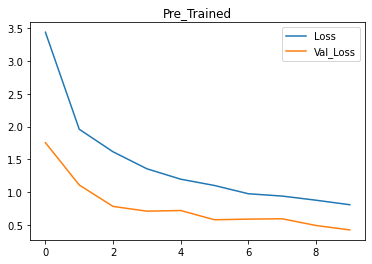

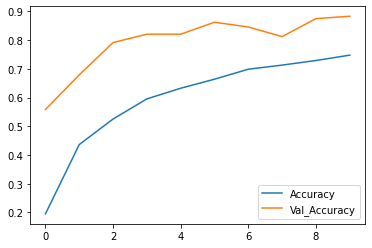

In [13]:
#Plot the model_trained_log history
plt.plot(model_trained_log.history['loss'],label='Loss')
plt.plot(model_trained_log.history['val_loss'],label='Val_Loss')
plt.title('Pre_Trained')
plt.legend()
plt.show()
plt.plot(model_trained_log.history['accuracy'],label='Accuracy')
plt.plot(model_trained_log.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.show()

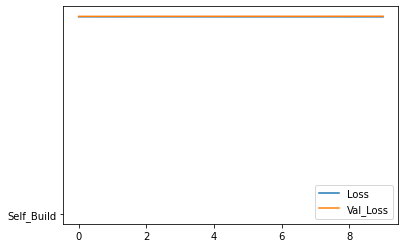

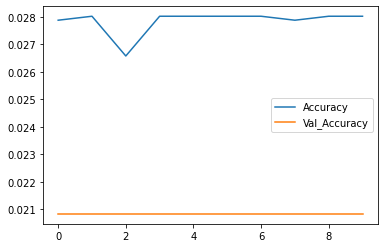

In [47]:
plt.plot(model_log.history['loss'],label='Loss')
plt.plot(model_log.history['val_loss'],label='Val_Loss')
plt.plot('Self_Build')
plt.legend()
plt.show()
plt.plot(model_log.history['accuracy'],label='Accuracy')
plt.plot(model_log.history['val_accuracy'],label='Val_Accuracy')
plt.legend()
plt.show()

## Conlusion:<br>
LOG for self_build model: I first trained the self_model with bigger size of shape, and it's too big for personal labtop, then decrease the number of parameter to limit time as 20min for each epochs, I tried both adam and sgd as optimizer but they can't imprve the accuracy.<br>After the evaluation, we can see that the self build model has terrible performance on our datasets, we didn't see any improvement during 10 epochs. It's hard to training large scale on a large network with millin parameters from scratch on our own labtop, even this network has similar architecture with VGG16 who is won a champion of competition.<br> Compare to self model, the pre_trained model has really good performace, it's get almost 80% acuuracy only in 10 epochs, the transfer learning provides a very high level of efficiency to our training process. We have steep gradient on loss and accuracy plot, this shows model is doing well on right direction.<br>I believe transfer learning can provide convenience for personal machine learning engineers. Without a powerful GPU, even with a large amount of data, it is difficult for us to train an efficient model by ourselves, which will destroy our computers and spend a lot of time.

# Testing Model by Predict Sample<br>
Using Pre_Trained model to predict test dataset sample

In [10]:
#Helper function for predict
label_dic = train.class_indices
label_dic = {i:j for j,i in label_dic.items()}
def predict(location):
    img = load_img(location, target_size = (224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, [0])
    answer = model_trained.predict(img)
    y_class = answer.argmax(axis = -1)
    y = " ".join(str(x) for x in y_class)
    predict = label_dic[int(y)]
    return predict

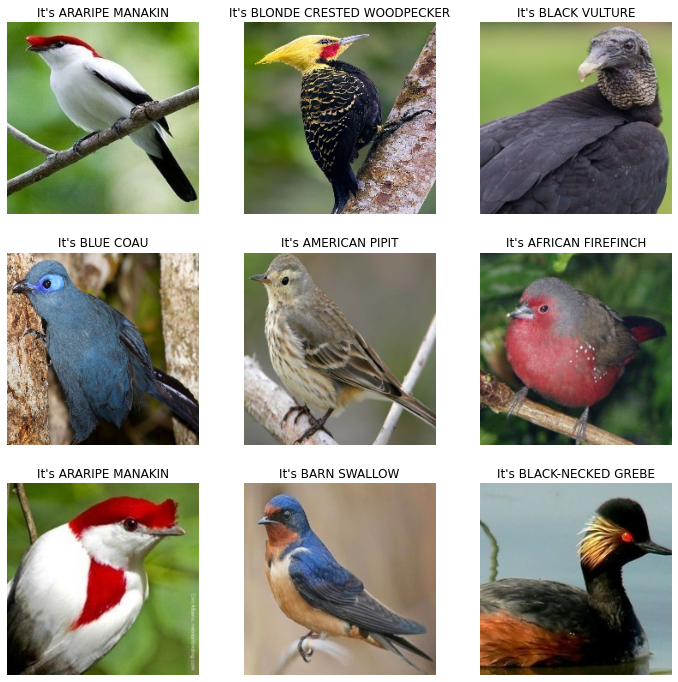

Right answer(top_left->down_right): 
ARARIPE MANAKIN
BLONDE CRESTED WOODPECKER
BLACK VULTURE
BLUE COAU
AMERICAN PIPIT
AFRICAN FIREFINCH
ARARIPE MANAKIN
BARN SWALLOW
BLACK-NECKED GREBE


In [45]:
#We randomly choose sample to predict
test_images = []
test_labels = []
for i in range(0,9):
    name = random.randint(0, len(test.filenames))
    test_images.append(test_dir+'/'+test.filenames[name])
    test_labels.append(test.filenames[name].split('/')[0])

#show 9 predict samples
plt.figure(figsize=(12,12))
for i in range(9):
    Bird = load_img(test_images[i])
    pred = int
    plt.subplot(3,3,+1+i)
    plt.title("It's "+ predict(test_images[i]), fontsize = 12)
    plt.axis(False)
    plt.imshow(Bird)
plt.show()
print("Right answer(top_left->down_right): ")
for label in test_labels:
    print(label)

## We successfully predicted 9 Birds Species with 100% accuracy!